In [2]:
import os
os.chdir("D:/R and PYTHON files/data set/project 1")
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats
# after importing the necessary libraries.
# load the data in environment
bikedata=pd.read_csv("day.csv",sep=',')

In [3]:
# Exploratory data analysis.
bikedata.shape

(731, 16)

In [7]:
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# creating the pivot table to visualize the bike count in different environmental changes.
bikedata2=bikedata.pivot('instant','temp','cnt')
bikedata3=bikedata.pivot('instant','atemp','cnt')
bikedata4=bikedata.pivot('instant','hum','cnt')
bikedata5=bikedata.pivot('instant','windspeed','cnt')

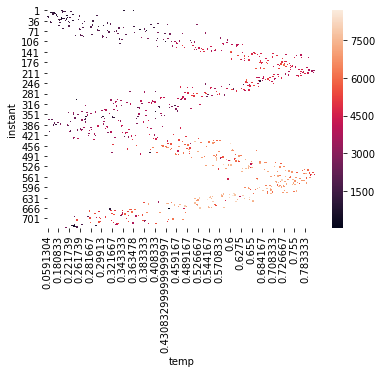

In [65]:
#visualizing the bike count in different environmental changes.
sns.heatmap(bikedata2).get_figure().savefig('figheat5.png')


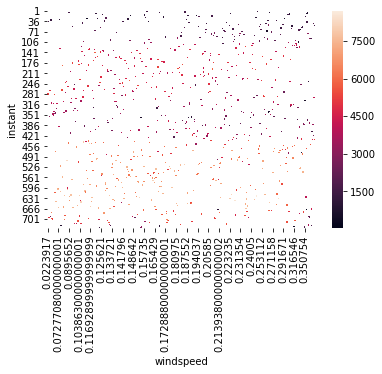

In [72]:
sns.heatmap(bikedata3).get_figure().savefig('figheat6.png')
# sns.heatmap(bikedata4).get_figure().savefig('figheat7.png')
# sns.heatmap(bikedata5).get_figure().savefig('figheat8.png')

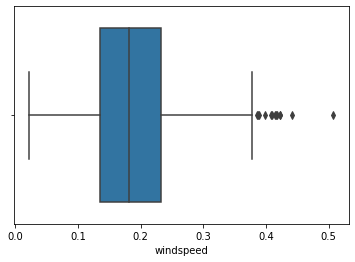

In [51]:

# outlier detection.
sns.boxplot(bikedata['windspeed']).get_figure().savefig('fig4.png')# found the outlier above the upper fence.

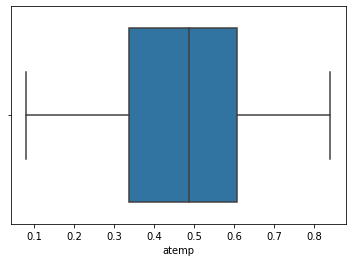

In [82]:
sns.boxplot(bikedata['atemp']).get_figure().savefig('fig2.png')

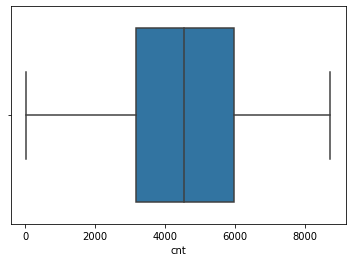

In [50]:
outlier=sns.boxplot(bikedata['cnt']).get_figure().savefig('fig3.png')

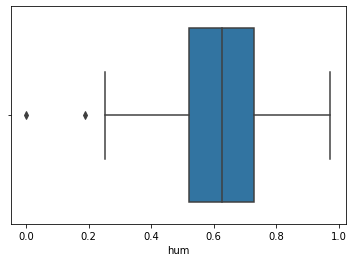

In [67]:
sns.boxplot(bikedata['hum']).get_figure().savefig('fig1.png')# found outlier below the lower fence

(array([ 13.,  62.,  71.,  73., 122., 137.,  81.,  76.,  79.,  17.]),
 array([  22. ,  891.2, 1760.4, 2629.6, 3498.8, 4368. , 5237.2, 6106.4,
        6975.6, 7844.8, 8714. ]),
 <a list of 10 Patch objects>)

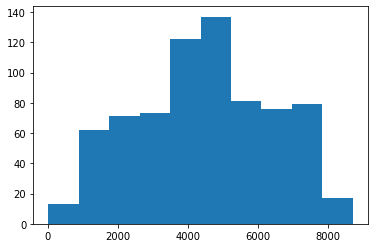

In [75]:
plt.hist(bikedata['cnt'])#distribution of count


In [76]:
# there are no missing values in this data set, as our dataset is very small.

In [3]:
# converting the  variables into perfect datatypes for further anlysis.
bikedata['season']=bikedata['season'].astype('category')
bikedata['weekday']=bikedata['weekday'].astype('category')
bikedata['yr']=bikedata['yr'].astype('category')
bikedata['mnth']=bikedata['mnth'].astype('category')
bikedata['holiday']=bikedata['holiday'].astype('category')
bikedata['workingday']=bikedata['workingday'].astype('category')
bikedata['weathersit']=bikedata['weathersit'].astype('category')
bikedata['temp']=bikedata['temp'].astype('float')
bikedata['hum']=bikedata['hum'].astype('float')
bikedata['atemp']=bikedata['atemp'].astype('float')
bikedata['windspeed']=bikedata['windspeed'].astype('float')
bikedata['cnt']=bikedata['cnt']=bikedata['cnt'].astype('float')
bikedata['registered']=bikedata['registered'].astype('float')
bikedata['casual']=bikedata['casual'].astype('float')


In [4]:
#deleting the outliers
outliernames=["hum","windspeed"]
for i in outliernames:
    print(i)
    q75, q25 = np.percentile(bikedata.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    marketing_train = bikedata.drop(bikedata[bikedata.loc[:,i] < min].index)
    marketing_train = bikedata.drop(bikedata[bikedata.loc[:,i] > max].index)

hum
0.20468725
1.0455212500000002
windspeed
-0.012446750000000034
0.38061125


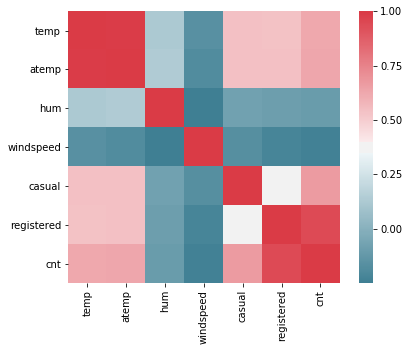

In [6]:
# feature selection/engineering
# saving all the numerical values in the object cnames
cnames=["temp","atemp","hum","windspeed","casual","registered","cnt"]
bike_corr=bikedata.loc[:,cnames]
f, ax = plt.subplots(figsize=(7, 5))
correlation_matrix=bike_corr.corr()
#correlation plot
sns.heatmap(correlation_matrix,mask=np.zeros_like(correlation_matrix,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax).get_figure().savefig('pythonheat_map.png')

In [7]:
# saving the categorical index in object catnames
# chi^2 test
catnames=["season","mnth","yr","holiday","weekday","workingday","weathersit"]
from scipy.stats import chi2_contingency
for i in catnames:
    print(i)
    chi2,p,dof,ex=chi2_contingency(pd.crosstab(bikedata['cnt'],bikedata[i]))
    print(p)

season
0.5440596338517547
mnth
0.49177634472851
yr
0.367724209978971
holiday
0.6781463865579803
weekday
0.4102128310764939
workingday
0.45435914436398794
weathersit
0.6407439686474243


In [5]:
# so removing all the less feature variables 
bikedata=bikedata.drop(['atemp','dteday','instant','season','yr','mnth','weekday'],axis=1)
bikedata.head()


,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,0,0,2,0.344167,0.805833,0.160446,331.0,654.0,985.0
1,0,0,2,0.363478,0.696087,0.248539,131.0,670.0,801.0
2,0,1,1,0.196364,0.437273,0.248309,120.0,1229.0,1349.0
3,0,1,1,0.200000,0.590435,0.160296,108.0,1454.0,1562.0
4,0,1,1,0.226957,0.436957,0.186900,82.0,1518.0,1600.0


In [6]:
# data modelling
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [7]:
# preparing the data for model.
x=bikedata.values[:,0:8]
y=bikedata.values[:,8]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [8]:
# random forest
random_forest=RandomForestRegressor(n_estimators = 20).fit(xtrain, ytrain)

In [9]:
# predictiion
randomforest_predict=random_forest.predict(xtest)

In [10]:
#mape                   #av= actual value and pv= predicted value
def mape(av, pv): 
    mape = np.mean(np.abs((av - pv) / av))*100
    return mape


In [11]:
mape(ytest,randomforest_predict)

3.175962395781774

In [30]:
#error percentage =3.17 %
#accuracy of the model =97 % 

In [40]:
print(randomforest_predict)

[4045.6  6990.9  4456.15 4191.   5365.15 1996.75 1860.7  5784.1  4284.6
 4551.3  1625.2  4565.85 6951.35 3704.95 6156.25 1472.8  6285.   2259.7
 4572.6  3304.75 2133.95 7963.4  6656.25 5506.15 2769.35  740.6  4396.8
 2405.5  8067.8  3228.4  5855.45 4429.6  2708.05 7054.85 4384.35 4579.8
 5906.5  7406.8  3522.65 5448.25 4879.35 7093.65 3904.5  6679.6  7692.7
 3008.9  4678.45 4277.45 3135.85 4352.25 7197.2  5548.35 4847.4  7498.6
 7310.05 5327.8  6307.   4174.95 3495.85 2476.2  3715.3  3194.15 3054.9
 6910.35 5125.2  1043.55 2716.95 4565.6  4844.45 4638.4  2367.65 3318.95
 5611.35 7874.9   678.2  4176.25 2298.05 4644.6  2805.05 3811.8  4229.75
 6298.6  5677.5  7469.75 4387.7  1615.2  4466.45 4042.45 2422.25 7477.8
 4062.45 2206.95 7131.75 5515.25 4050.15 5050.3  7789.6  5056.05 3939.05
 3793.05 6982.15 5314.05 4220.45 3269.15 4487.3  1049.4  7467.7   837.75
 4315.55 7669.75 3578.9  5191.75 4928.55 4654.45 5038.75 7552.8  2998.7
 3420.7  4112.95 6244.9  4615.75 6845.55 2144.8  1378.05 392

In [ ]:
# freezing the model random forest with high accuracy.